In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath(".")))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.datasets import MNIST
from model.mnist import VAEMNIST, CVAEMNIST

%load_ext autoreload
%autoreload 2

# Evaluate VAE on mnist

## Load pretrained model

In [3]:
DEVICE = "cuda"
CHECKPOINT_PATH = "../run/mnist_checkpoint/best.pth"

In [4]:
checkpoint = torch.load(CHECKPOINT_PATH)

In [5]:
model = VAEMNIST(latent_dim=2)
model.load_state_dict(checkpoint['model'])
model = model.to(DEVICE)
model = model.eval()

## Prepare input image

In [6]:
transform = T.Compose([T.ToTensor()])
rev_transform = T.Compose([T.ToPILImage()])

In [7]:
dataset = MNIST(root="../download", train=False, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

## Get latent feature of all data

In [8]:
all_latents = []
all_labels = []

for imgs, labels in dataloader:
    imgs = imgs.to(DEVICE)
    labels = labels.to(DEVICE)
    
    Zs = model.get_latent(imgs)
    all_latents.append(Zs.detach().cpu().numpy())
    all_labels.append(labels.detach().cpu().numpy())
    
all_latents = np.concatenate(all_latents)
all_labels = np.concatenate(all_labels)

## Visualize latent features

In [9]:
latent_group = {}

for label in np.unique(all_labels):
    indices = np.where(all_labels == label)
    latents = all_latents[indices]
    latent_group[label] = latents

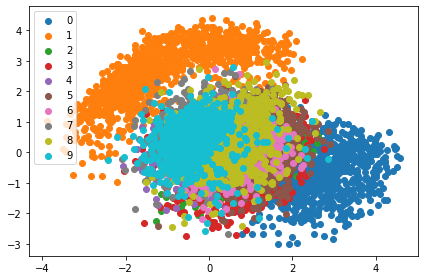

In [10]:
for label, latents in latent_group.items():
    plt.scatter(latents[:, 0], latents[:, 1], label=str(label))
    
plt.legend()
plt.tight_layout()

# Evaluate CVAE on mnist

In [35]:
DEVICE = "cuda"
CHECKPOINT_PATH = "../run/mnist_cvae_checkpoint/best.pth"

In [36]:
checkpoint = torch.load(CHECKPOINT_PATH)

In [37]:
model = CVAEMNIST(latent_dim=2)
model.load_state_dict(checkpoint['model'])
model = model.to(DEVICE)
model = model.eval()

In [38]:
all_latents = []
all_labels = []

for imgs, labels in dataloader:
    imgs = imgs.to(DEVICE)
    labels = labels.to(DEVICE)
    
    Zs = model.get_latent(imgs, labels)
    all_latents.append(Zs.detach().cpu().numpy())
    all_labels.append(labels.detach().cpu().numpy())
    
all_latents = np.concatenate(all_latents)
all_labels = np.concatenate(all_labels)

In [39]:
latent_group = {}

for label in np.unique(all_labels):
    indices = np.where(all_labels == label)
    latents = all_latents[indices]
    latent_group[label] = latents

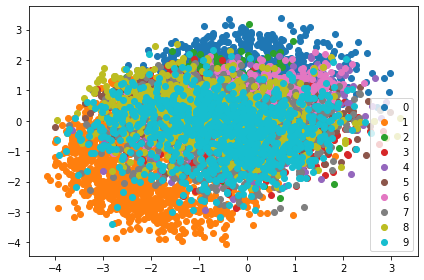

In [40]:
for label, latents in latent_group.items():
    plt.scatter(latents[:, 0], latents[:, 1], label=str(label))
    
plt.legend()
plt.tight_layout()

In [41]:
rec, mu, log_var = model(imgs, labels)

In [50]:
rev_transform(rec[7].detach().cpu())